In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [30]:
df = pd.read_csv('data.csv')
print(df.head())

   Distance   Force    2s + d  1/sqrt(Force)
0    0.0002  0.0082  0.004493      11.043153
1    0.0003  0.0054  0.004693      13.608276
2    0.0004  0.0035  0.004893      16.903085
3    0.0005  0.0026  0.005093      19.611614
4    0.0006  0.0021  0.005293      21.821789


In [31]:
df['Distance_Error'] = 0.0000195 
df['Force_Error'] = 0.000678

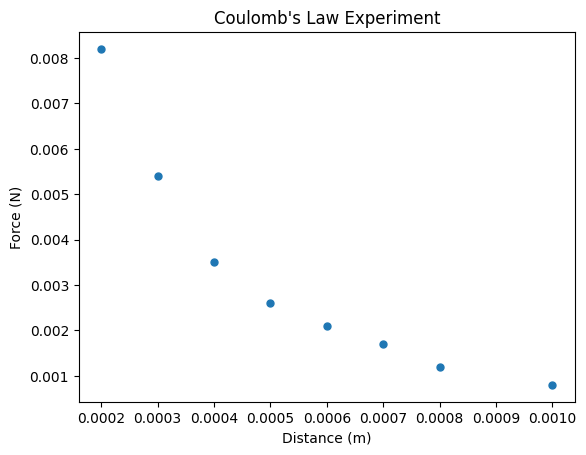

In [32]:
plt.errorbar(df['Distance'], df['Force'], fmt='o', markersize=5, capsize=3)

plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.title('Coulomb\'s Law Experiment')

plt.show()

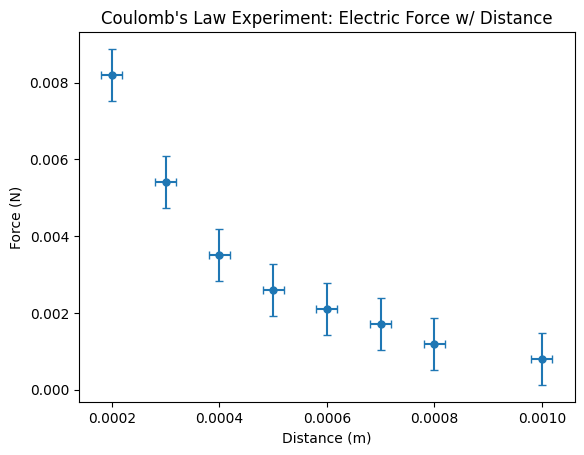

In [33]:
plt.errorbar(df['Distance'], df['Force'], xerr=df['Distance_Error'], yerr=df['Force_Error'], fmt='o', markersize=5, capsize=3)

plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.title('Coulomb\'s Law Experiment: Electric Force w/ Distance')

plt.show()

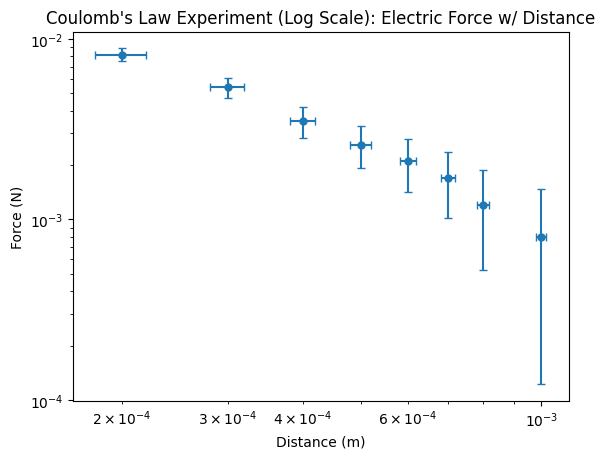

In [34]:
import matplotlib.pyplot as plt

plt.errorbar(df['Distance'], df['Force'], xerr=df['Distance_Error'], yerr=df['Force_Error'], fmt='o', markersize=5, capsize=3)

# Using a logarithmic scale on both axes
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.title('Coulomb\'s Law Experiment (Log Scale): Electric Force w/ Distance')

plt.show()

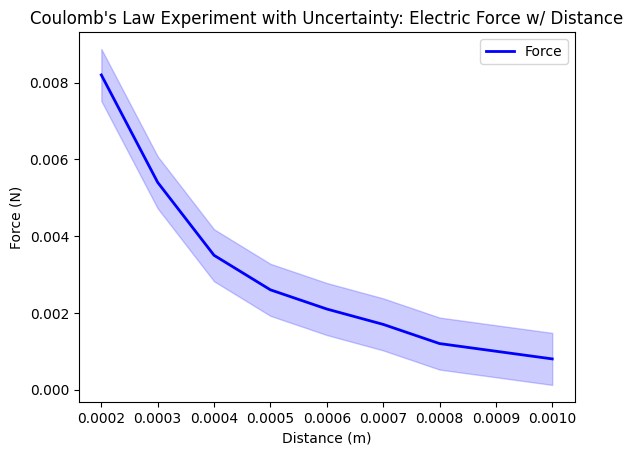

In [35]:
import matplotlib.pyplot as plt

# {We have to sort data for a smoother line graph}
sorted_indices = df['Distance'].argsort()
sorted_distance = df['Distance'][sorted_indices]
sorted_force = df['Force'][sorted_indices]
sorted_distance_error = df['Distance_Error'][sorted_indices]
sorted_force_error = df['Force_Error'][sorted_indices]

# LINE GRAPH WITH SHADED(!!) UNCERTAINTY AREA :)
plt.plot(sorted_distance, sorted_force, label='Force', color='blue', linewidth=2)
plt.fill_between(sorted_distance, sorted_force - sorted_force_error, sorted_force + sorted_force_error, color='blue', alpha=0.2)

plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.title('Coulomb\'s Law Experiment with Uncertainty: Electric Force w/ Distance')

plt.legend()

plt.show()


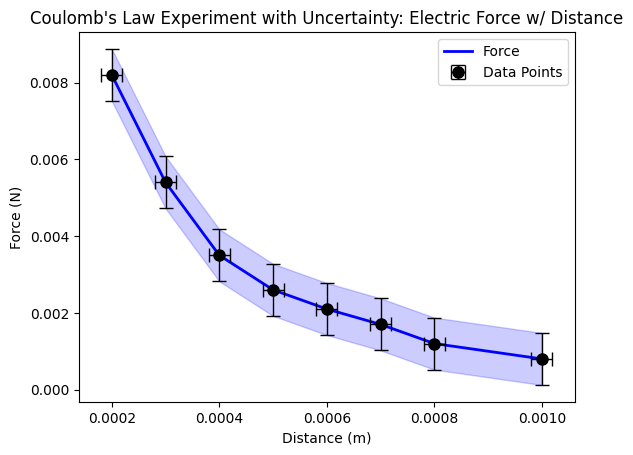

In [36]:
import matplotlib.pyplot as plt

sorted_indices = df['Distance'].argsort()
sorted_distance = df['Distance'][sorted_indices]
sorted_force = df['Force'][sorted_indices]
sorted_distance_error = df['Distance_Error'][sorted_indices]
sorted_force_error = df['Force_Error'][sorted_indices]

plt.plot(sorted_distance, sorted_force, label='Force', color='blue', linewidth=2)
plt.fill_between(sorted_distance, sorted_force - sorted_force_error, sorted_force + sorted_force_error, color='blue', alpha=0.2)

# Implementing fmt='o' as well as a legend.
plt.errorbar(df['Distance'], df['Force'], xerr=df['Distance_Error'], yerr=df['Force_Error'], fmt='o', markersize=8, capsize=5, color='blue', ecolor='black', elinewidth=1, markeredgecolor='black', markerfacecolor='black', label='Data Points')

plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.title('Coulomb\'s Law Experiment with Uncertainty: Electric Force w/ Distance')

plt.legend()

plt.show()

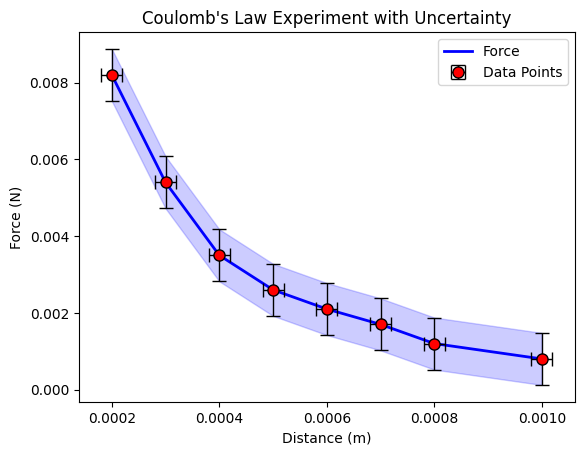

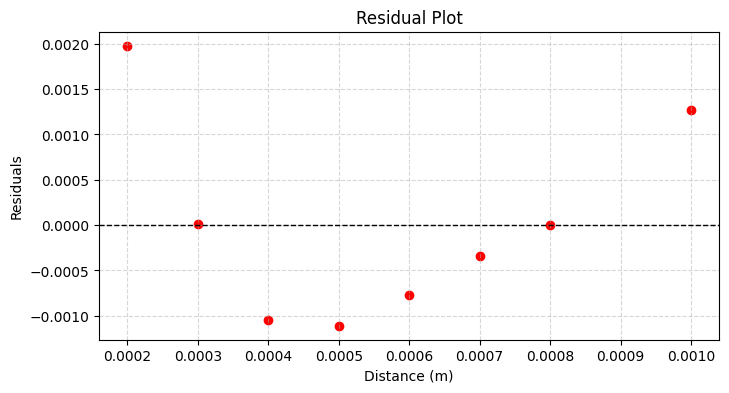

In [39]:
sorted_indices = df['Distance'].argsort()
sorted_distance = df['Distance'][sorted_indices]
sorted_force = df['Force'][sorted_indices]
sorted_distance_error = df['Distance_Error'][sorted_indices]
sorted_force_error = df['Force_Error'][sorted_indices]

# Residual calculation
residuals = df['Force'] - np.polyval(np.polyfit(df['Distance'], df['Force'], 1), df['Distance'])

plt.plot(sorted_distance, sorted_force, label='Force', color='blue', linewidth=2)
plt.fill_between(sorted_distance, sorted_force - sorted_force_error, sorted_force + sorted_force_error, color='blue', alpha=0.2)

plt.errorbar(df['Distance'], df['Force'], xerr=df['Distance_Error'], yerr=df['Force_Error'], fmt='o', markersize=8, capsize=5, color='red', ecolor='black', elinewidth=1, markeredgecolor='black', markerfacecolor='red', label='Data Points')

plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.title('Coulomb\'s Law Experiment with Uncertainty')

plt.legend()

# Residual plot
plt.figure(figsize=(8, 4))
plt.scatter(df['Distance'], residuals, marker='o', color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Distance (m)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()